# Weather Images Classification (Rain, Cloudy, Shine, Sunrise)

- **Credit**: fastai & its notebook [01_intro.ipynb](https://github.com/fastai/fastbook/blob/master/01_intro.ipynb)
- **Dataset**: [Multi-class Weather Dataset for Image Classification](https://data.mendeley.com/datasets/4drtyfjtfy/1) (link from [Top 10 Image Classification Datasets for Machine Learning](https://lionbridge.ai/datasets/top-10-image-classification-datasets-for-machine-learning/))
- **Author**: [Pierre GUILLOU](https://www.linkedin.com/in/pierreguillou/)
- **Date**: 01/03/2021
- **Update**: 08/03/2021

In [1]:
#hide
# !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *

## Original code from fastai notebook 01_intro.ipynb

In [ ]:
# CLICK ME
# from fastai.vision.all import *
# path = untar_data(URLs.PETS)/'images'

# def is_cat(x): return x[0].isupper()
# dls = ImageDataLoaders.from_name_func(
#     path, get_image_files(path), valid_pct=0.2, seed=42,
#    label_func=is_cat, item_tfms=Resize(224))

# learn = cnn_learner(dls, resnet34, metrics=error_rate)
# learn.fine_tune(1)

## Use of the fastai code with another dataset

### 1. Import fastai vision library

In [3]:
from fastai.vision.all import *

### 2. Get path to images

#### Example 1 | Link to download a zip file

In [11]:
!mkdir MyImages
%cd MyImages

/mnt/home/pierre/fastbook/clean/MyImages


In [12]:
import requests # This library is used to make requests to internet

# We are storing url of dataset
url = 'https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/4drtyfjtfy-1.zip'
# We are creating a requests variable with the above url
r = requests.get(url, allow_redirects=True)
# We are writing the content of above request to 'iris.data' file
open('4drtyfjtfy-1.zip', 'wb').write(r.content)

95592747

In [13]:
!unzip 4drtyfjtfy-1.zip

Archive:  4drtyfjtfy-1.zip
  inflating: dataset2.zip            


In [14]:
!unzip dataset2.zip

Archive:  dataset2.zip
   creating: dataset2/
  inflating: dataset2/cloudy1.jpg    
  inflating: dataset2/cloudy10.jpg   
  inflating: dataset2/cloudy100.jpg  
  inflating: dataset2/cloudy101.jpg  
  inflating: dataset2/cloudy102.jpg  
  inflating: dataset2/cloudy103.jpg  
  inflating: dataset2/cloudy104.jpg  
  inflating: dataset2/cloudy105.jpg  
  inflating: dataset2/cloudy106.jpg  
  inflating: dataset2/cloudy107.jpg  
  inflating: dataset2/cloudy108.jpg  
  inflating: dataset2/cloudy109.jpg  
  inflating: dataset2/cloudy11.jpg   
  inflating: dataset2/cloudy110.jpg  
  inflating: dataset2/cloudy111.jpg  
  inflating: dataset2/cloudy112.jpg  
  inflating: dataset2/cloudy113.jpg  
  inflating: dataset2/cloudy114.jpg  
  inflating: dataset2/cloudy115.jpg  
  inflating: dataset2/cloudy116.jpg  
  inflating: dataset2/cloudy117.jpg  
  inflating: dataset2/cloudy118.jpg  
  inflating: dataset2/cloudy119.jpg  
  inflating: dataset2/cloudy12.jpg   
  inflating: dataset2/cloudy120.jpg  
  in

In [15]:
!ls

4drtyfjtfy-1.zip  dataset2  dataset2.zip


In [16]:
%cd ../..

/mnt/home/pierre/fastbook


In [8]:
from pathlib import Path
path = Path.cwd()/'clean'
path_imgs = path/'MyImages/dataset2'
path_imgs

Path('/mnt/home/pierre/fastbook/clean/MyImages/dataset2')

In [9]:
path_imgs.ls()

(#1125) [Path('/mnt/home/pierre/fastbook/clean/MyImages/dataset2/sunrise200.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/dataset2/cloudy254.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/dataset2/cloudy201.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/dataset2/cloudy175.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/dataset2/cloudy144.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/dataset2/cloudy300.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/dataset2/shine247.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/dataset2/shine49.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/dataset2/shine81.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/dataset2/cloudy46.jpg')...]

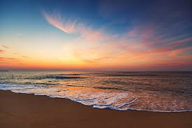

In [24]:
img = PILImage.create(path_imgs.ls()[0])
img.to_thumb(192)

#### Example 2 | Package bing_image_downloader

In [2]:
# !pip install bing_image_downloader
from bing_image_downloader import downloader

In [4]:
query_string = ["rain","cloudy","sunrise","shine"]
for qs in query_string:
    downloader.download(qs, limit=100,  output_dir='MyImages/weatherBing', adult_filter_off=True, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 101 Images on Page 1.


[%] Downloading Image #1 from https://greekherald.com.au/wp-content/uploads/2020/01/blog-rain-or-shine.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://patch.com/img/cdn20/users/22729282/20200928/072619/styles/patch_image/public/rain-and-shutter___28072559502.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://moneymarketing.co.za/wp-content/uploads/2019/12/Heavy-rain-1024x458.jpeg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.rcinet.ca/eye-on-the-arctic/wp-content/uploads/sites/30/2017/08/rain-expected-in-lapland-as-sun-shines-over-finland-2.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/rain-falling-on-ground-david-de-lossy.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://dreamicus.com/data/rain/rain-03.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://cdn.motor1.com/ima

#### Example 3 | kaggle

- source: https://github.com/Kaggle/kaggle-api
- notebook 9: https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb

### 3. Define label function 

In [38]:
# def is_cat(x): return x[0].isupper()

def is_category(x): 
    if 'cloudy' in x: return 'cloudy'
    elif 'rain' in x: return 'rain'
    elif 'shine' in x: return 'shine'
    elif 'sunrise' in x: return 'sunrise'

In [26]:
path_imgs.ls()[0],is_category(str(path_imgs.ls()[0]))

(Path('/mnt/home/pierre/fastbook/clean/MyImages/dataset2/sunrise200.jpg'),
 'sunrise')

### 4. Define outputs folder

In [11]:
# create path to save outputs
path_outputs = path/'outputs'
path_outputs

Path('/mnt/home/pierre/fastbook/clean/outputs')

### 5. Define dataloaders (training + validation)

In [14]:
ds = [(1,2),(2,3),(3,4),(4,5)]
dl = DataLoader(ds, bs=2)

In [16]:
dl.dataset

[(1, 2), (2, 3), (3, 4), (4, 5)]

#### Option 1 | Factory method

- ImageDataLoaders: https://docs.fast.ai/vision.data.html#ImageDataLoaders
- ImageDataLoaders.from_name_func: https://docs.fast.ai/vision.data.html#ImageDataLoaders.from_name_func 

In [39]:
dls = ImageDataLoaders.from_name_func(
    path_outputs, 
    get_image_files(path_imgs), 
    valid_pct=0.2, seed=42,
    label_func=is_category, 
    item_tfms=Resize(224)
)

In [40]:
dls.vocab

['cloudy', 'rain', 'shine', 'sunrise']

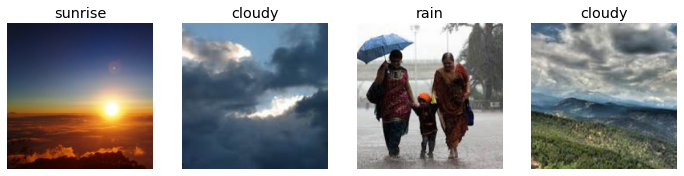

In [41]:
dls.train.show_batch(max_n=4, nrows=1)

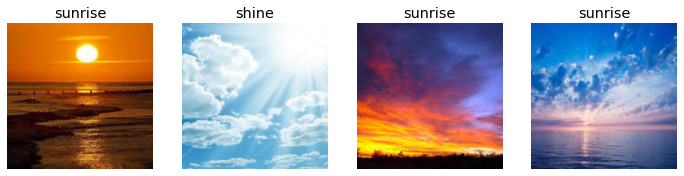

In [42]:
dls.valid.show_batch(max_n=4, nrows=1)

#### Option 2 | DataBlock

- DataBlock: https://docs.fast.ai/tutorial.datablock.html
- Data Augmentation: https://docs.fast.ai/vision.augment.html

The way we usually build the data block in one go is by answering a list of questions:

- what is the types of your inputs/targets? Here images and categories
- where is your data? Here in filenames in subfolders
- does something need to be applied to inputs? Here no
- does something need to be applied to the target? Here the label_func function
- how to split the data? Here randomly
- do we need to apply something on formed items? Here a resize
- do we need to apply something on formed batches? Here no

In [43]:
# def is_cat(x): return x[0].isupper()

def is_category(x): 
    x = x.name
    if 'cloudy' in x: return 'cloudy'
    elif 'rain' in x: return 'rain'
    elif 'shine' in x: return 'shine'
    elif 'sunrise' in x: return 'sunrise'

In [44]:
# dls = ImageDataLoaders.from_name_func(
#     path_outputs, 
#     get_image_files(path_imgs), 
#     valid_pct=0.2, seed=42,
#     label_func=is_category, 
#     item_tfms=Resize(224)
# )

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=is_category,
    item_tfms=Resize(224))

dls = dblock.dataloaders(source=path_imgs, path=path_outputs)

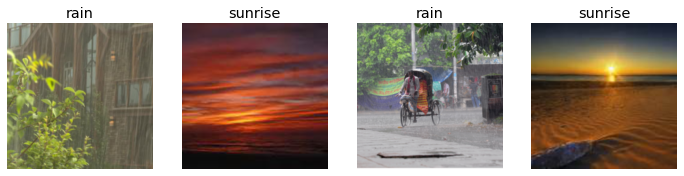

In [49]:
dls.train.show_batch(max_n=4, nrows=1)

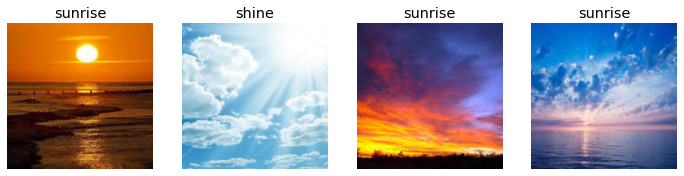

In [50]:
dls.valid.show_batch(max_n=4, nrows=1)

### 6. Define learner

In [51]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [52]:
learn.path

Path('/mnt/home/pierre/fastbook/clean/outputs')

### 7. Training

In [34]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.312081,0.352858,0.128889,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.243597,0.345533,0.128889,00:12


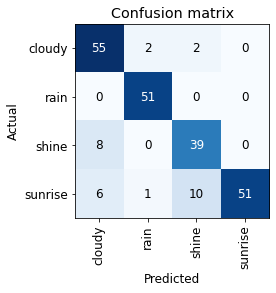

In [39]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

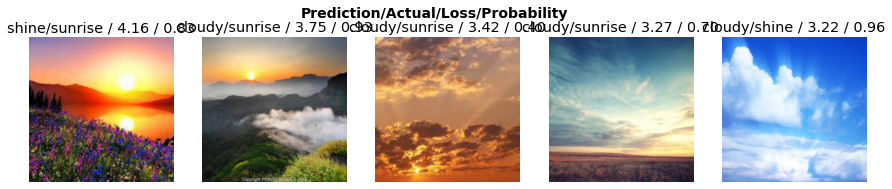

In [43]:
interp.plot_top_losses(5, nrows=1)

In [37]:
learn.save("weather1")

Path('/mnt/home/pierre/fastbook/clean/outputs/models/weather1.pth')

## Prediction

In [14]:
# Option 1
# Get any image from yoru computer

In [ ]:
uploader = widgets.FileUpload()
uploader

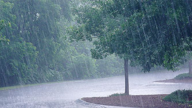

In [47]:
# Option 2
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/weather.jpg'])
img = PILImage.create('images/weather.jpg')
img.to_thumb(192)

In [48]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Categogy: {is_cat}.")
print(f"Probability: {probs[torch.argmax(probs).item()]:.6f}")

Categogy: rain.
Probability: 0.998556


## Annex 1 | Learning Rate

- LR Finder: https://docs.fast.ai/callback.schedule.html#LRFinder
- https://stackoverflow.com/questions/61172627/choosing-the-learning-rate-using-fastais-learn-lr-find

In [144]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [145]:
learn.lr

0.001

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.0008317637839354575)

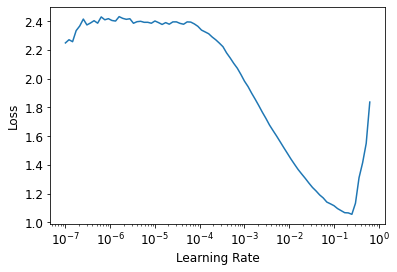

In [146]:
learn.lr_find()

In [147]:
learn.lr = 3e-3
learn.lr

0.003

In [148]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.373047,0.492252,0.182222,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.217504,0.663303,0.213333,00:05


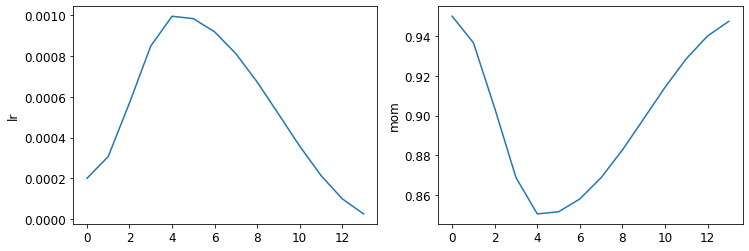

In [149]:
learn.recorder.plot_sched()

## Annex 2 | Number of training/validation steps

In [150]:
# training
int(len(learn.dls.train_ds) / learn.dls.train.bs) + 1

15

In [151]:
# validation
int(len(learn.dls.valid_ds) / learn.dls.valid.bs) + 1

4

## Annex 3 | Overfitting

In [172]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate,accuracy])

In [173]:
learn.lr = 1e-2

In [174]:
results = learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.371162,0.551153,0.186667,0.813333,00:05


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.238954,0.476436,0.173333,0.826667,00:05
1,0.163191,0.523800,0.164444,0.835556,00:06
2,0.110377,0.587839,0.177778,0.822222,00:06
3,0.082552,0.577200,0.173333,0.826667,00:05


In [175]:
# source: https://forums.fast.ai/t/plotting-metrics-after-learning/69937/3
from fastai.imports import *
from fastai.torch_core import *
from fastai.learner import *
    
@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

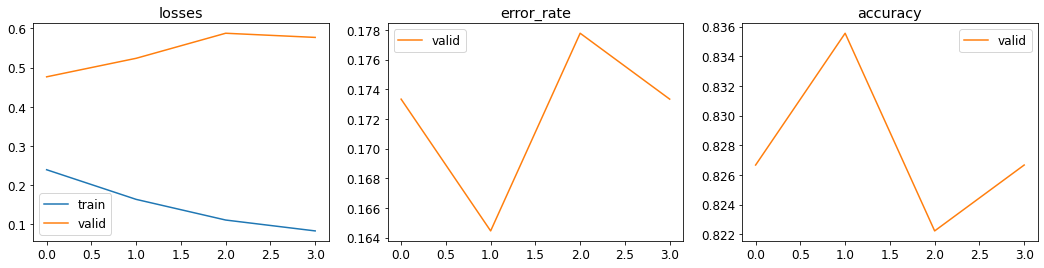

In [176]:
learn.recorder.plot_metrics()